# Project Name: Advertising Sales Channel Prediction


About Project: The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In [92]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#Import Dataset
ds= pd.read_csv('Advertising.csv')
ds.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [94]:
df= pd.DataFrame(data=ds)
df.rename(columns={ df.columns[0]: "Sr.No." }, inplace = True)  
df

,Sr.No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [95]:
df.set_index('Sr.No.', inplace= True)
df.head()

,TV,radio,newspaper,sales
Sr.No.,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [96]:
df.shape

(200, 4)

In [97]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [99]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Obervations: For all columns count is 200 so no any Null values in Dataset. In newspaper column there is more difference in 75th percentile and max value. So there is outliers present. Also in TV column as per mean and std, data is not disctributed normaly.

In [100]:
#Checking for Null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Obervations: No null values in dataset.

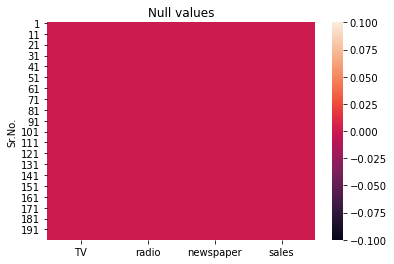

In [101]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Obervations: No null values in dataset.

TV              AxesSubplot(0.125,0.536818;0.352273x0.343182)
radio        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
newspaper          AxesSubplot(0.125,0.125;0.352273x0.343182)
sales           AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

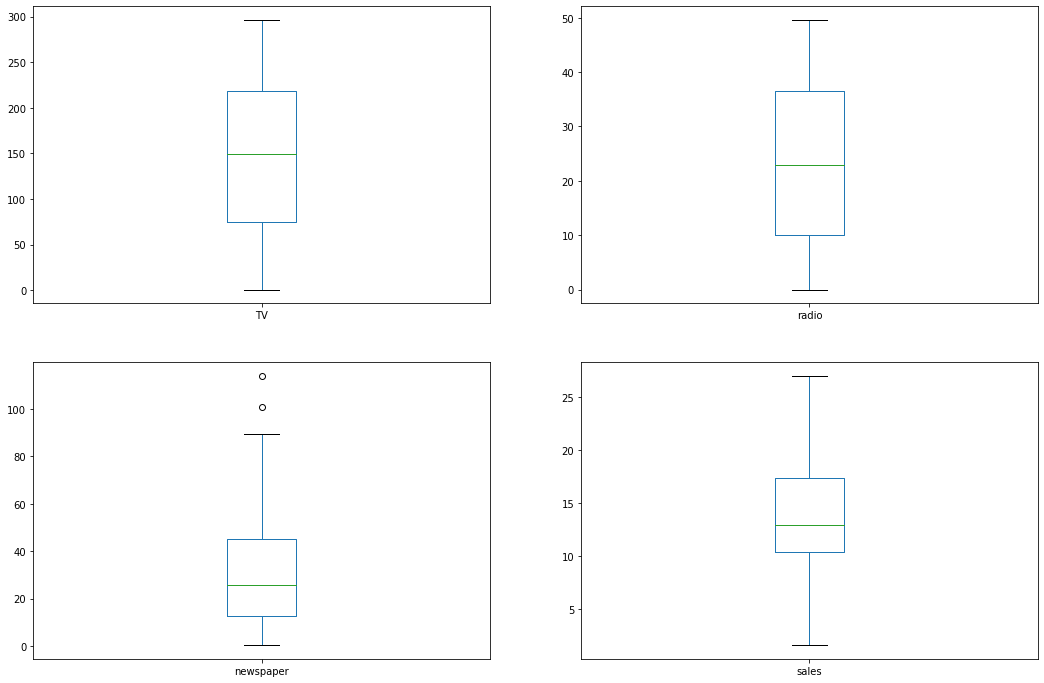

In [102]:
#Univariate Analysis
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(18,12))

Observatios: No outliers present in dataset except newspaper column but that one also not considerable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239BD241C10>,
      dtype=object)

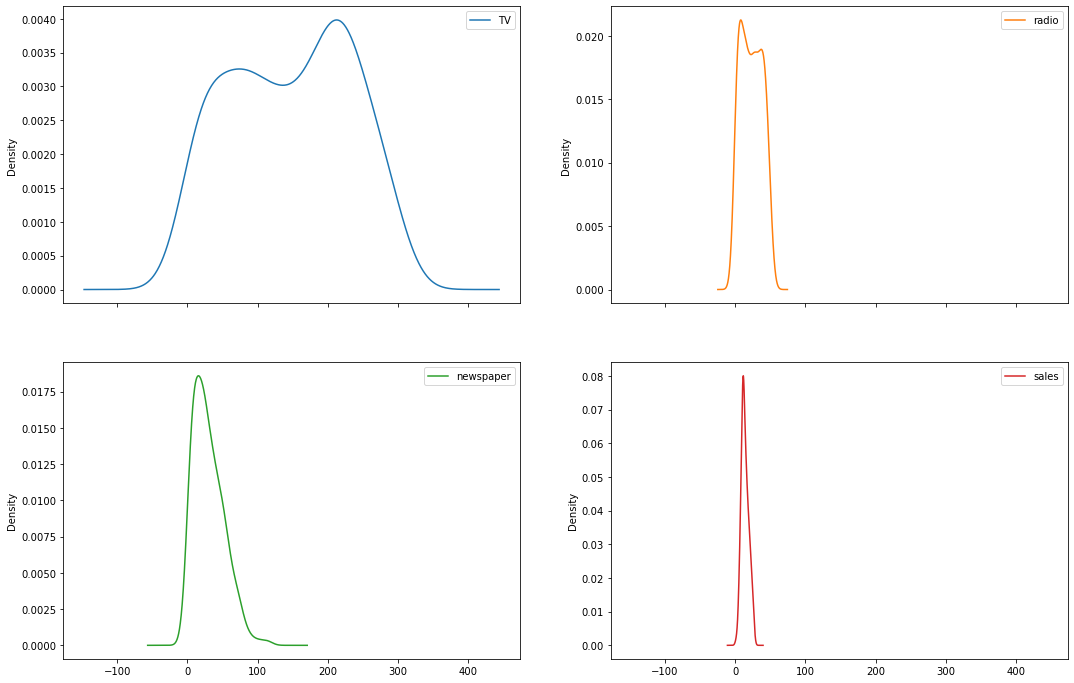

In [103]:
df.plot(kind='density', subplots=True, layout=(2,2), figsize=(18,12))

Obervations: Almost for all columns data is normally distributed.

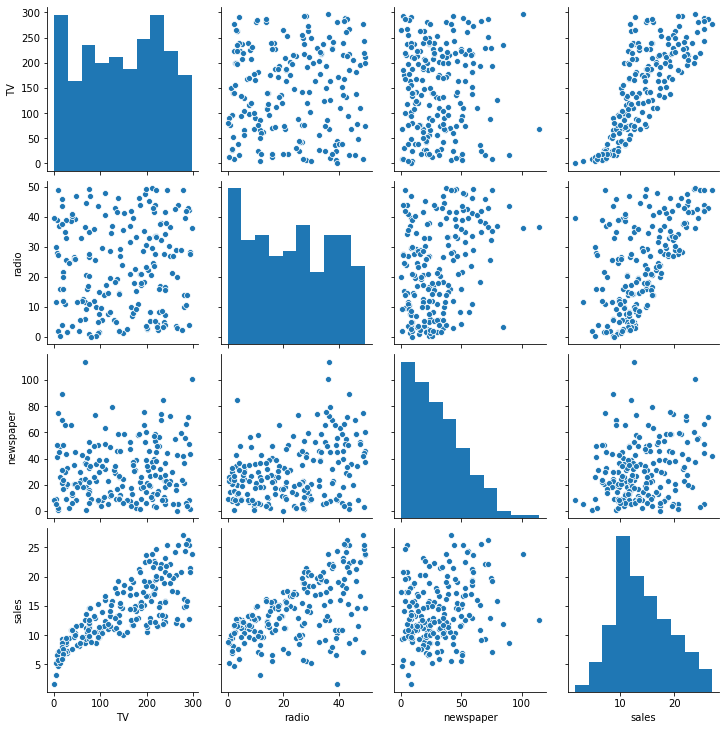

In [104]:
#Bivariate Analysis
sns.pairplot(df)

Observatios: For TV channel sales rate is increasing linearly. For radio channel sales rate increasing considerable. But for newspaper and sales data is scattered more as like that much no relationship between them.

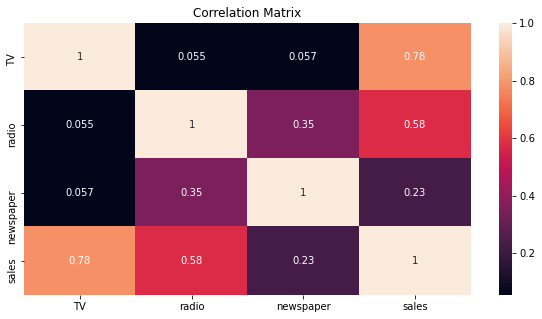

In [105]:
#correlation between different variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Observations: So its clear that TV channel is most correlated to Sales. So now TV is our selected feature variable which is used to predict sales.

In [106]:
#Splitting data
x= df['TV']
y= df['sales']

In [107]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [108]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=100)

In [109]:
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [110]:
lm= LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [111]:
lm.coef_

array([[0.04649736]])

In [112]:
lm.intercept_

array([6.98966586])

Conclusion: we will get equation as [Sales= 6.9897 + 0.0465*TV]

In [113]:
pred_lm= lm.predict(x_test)
pred_lm

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

In [114]:
print('errors')
print('Mean absolute error:',mean_absolute_error(y_test, pred_lm))
print('Mean squared error: ', mean_squared_error(y_test, pred_lm))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, pred_lm)))

errors
Mean absolute error: 2.1619849326720724
Mean squared error:  7.97579853285485
Root mean squared error:  2.8241456288327007


In [115]:
print(r2_score(y_test, pred_lm))

0.5942987267783302


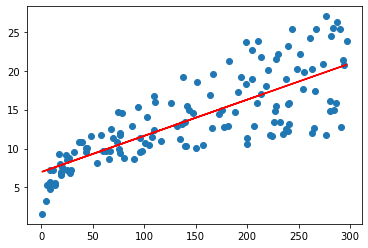

In [116]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9897 + 0.0465*x_train, 'r')
plt.show()

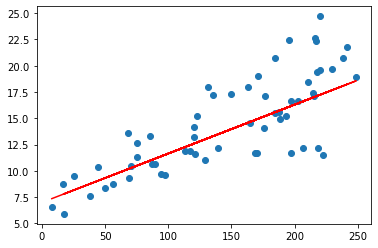

In [117]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9897 + 0.0465*x_test, 'r')
plt.show()

Observations: Regression line is a pretty good fit to the data.

In [118]:
#checking for the overfitting and underfitting

from sklearn.linear_model import Lasso, Ridge, ElasticNet

ls= Lasso(alpha=0.0001)
rd= Ridge(alpha=0.0001)
enr= ElasticNet(alpha=0.0001)

models= [ls, rd,enr]

for m in models:
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))

0.594298697109957
0.5942987267684765
0.5942987112544008


In [119]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

svr= SVR(kernel='linear')
rfr= RandomForestRegressor(n_estimators= 100, random_state= 42)
ad=AdaBoostRegressor()

model= [svr, rfr, ad]

for m in model:
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))

0.6007821416345425
0.5310363816785764
0.5752340472923825


In [120]:
#Hyperparameter Tuning for Best selected model SVR

from sklearn.model_selection import GridSearchCV

parameters= {'gamma': [1e-4, 1e-3, 0.01, 0.1], 'C': [1, 10, 100]}

GSV= GridSearchCV(svr, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'C': 1, 'gamma': 0.0001}

In [121]:
GSV_predict= GSV.best_estimator_.predict(x_test)
print(r2_score(y_test, GSV_predict))
print('Mean absolute error:',mean_absolute_error(y_test, GSV_predict))
print('Mean squared error: ', mean_squared_error(y_test, GSV_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, GSV_predict)))

0.6007821416345425
Mean absolute error: 2.127053023057053
Mean squared error:  7.848339207210057
Root mean squared error:  2.801488748363994


In [122]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'advertising_best_svr_model.obj')

['advertising_best_svr_model.obj']